In [11]:
from facetorch import FaceAnalyzer
from facetorch.analyzer.utilizer import LandmarkDrawerTorch
from omegaconf import OmegaConf
from torch.nn.functional import cosine_similarity
from typing import Dict
import operator
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np

## Configure

In [2]:
path_img_input="../Dataset/Labeled_Faces_in_the_Wild/lfw-deepfunneled/lfw-deepfunneled/Aaron_Eckhart/Aaron_Eckhart_0001.jpg"
path_img_output="test_output.jpg"
path_config="../Pre-processing/gpu.config.yml"


cfg = OmegaConf.load(path_config)

## Startup

In [3]:
# initialize
analyzer = FaceAnalyzer(cfg.analyzer)


{"asctime": "2024-10-04 13:59:46,744", "levelname": "INFO", "message": "Initializing FaceAnalyzer"}
{"asctime": "2024-10-04 13:59:46,744", "levelname": "INFO", "message": "Initializing BaseReader"}
{"asctime": "2024-10-04 13:59:47,002", "levelname": "INFO", "message": "Initializing FaceDetector"}
{"asctime": "2024-10-04 13:59:47,622", "levelname": "INFO", "message": "Initializing FaceUnifier"}
{"asctime": "2024-10-04 13:59:47,635", "levelname": "INFO", "message": "Initializing FacePredictor objects"}
{"asctime": "2024-10-04 13:59:47,636", "levelname": "INFO", "message": "Initializing FacePredictor embed"}
{"asctime": "2024-10-04 13:59:47,877", "levelname": "INFO", "message": "Initializing FacePredictor verify"}
{"asctime": "2024-10-04 13:59:51,446", "levelname": "INFO", "message": "Initializing FacePredictor au"}
{"asctime": "2024-10-04 13:59:52,142", "levelname": "INFO", "message": "Initializing FacePredictor va"}
{"asctime": "2024-10-04 13:59:52,193", "levelname": "INFO", "message": 

## Inference

In [4]:
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=cfg.return_img_data,
        include_tensors=cfg.include_tensors,
        path_output=path_img_output,
    )


{"asctime": "2024-10-04 13:59:55,407", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2024-10-04 13:59:55,408", "levelname": "INFO", "message": "Reading image", "input": "../Dataset/Labeled_Faces_in_the_Wild/lfw-deepfunneled/lfw-deepfunneled/Aaron_Eckhart/Aaron_Eckhart_0001.jpg"}
{"asctime": "2024-10-04 13:59:55,505", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2024-10-04 14:00:00,799", "levelname": "INFO", "message": "Number of faces: 1"}
{"asctime": "2024-10-04 14:00:00,800", "levelname": "INFO", "message": "Unifying faces"}
{"asctime": "2024-10-04 14:00:00,810", "levelname": "INFO", "message": "Predicting facial features"}
{"asctime": "2024-10-04 14:00:00,811", "levelname": "INFO", "message": "Running FacePredictor: embed"}
c:\Users\46737\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1541: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STAT

In [5]:
response.faces[0].tensor.shape

torch.Size([3, 380, 380])

## Output image

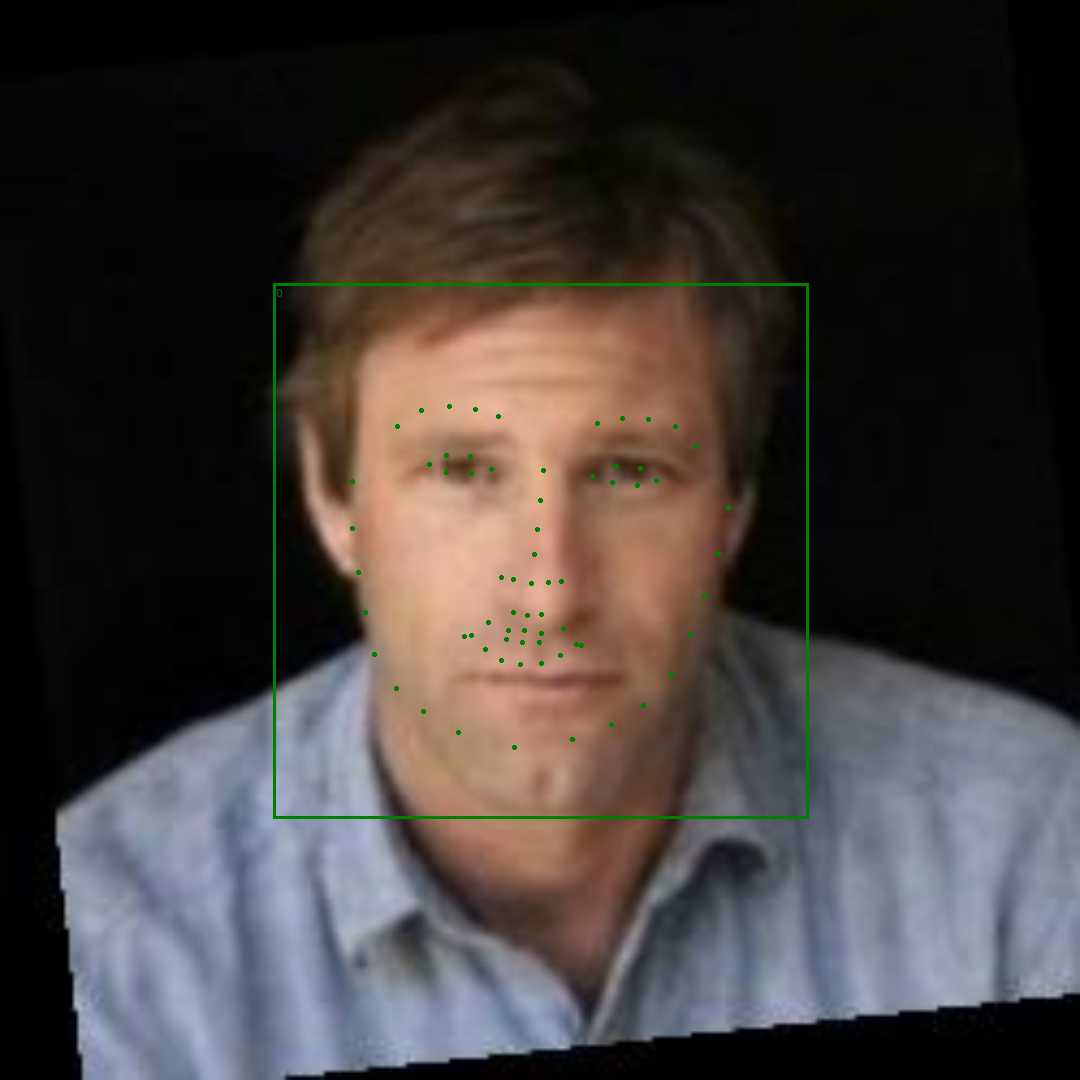

In [6]:
pil_image = torchvision.transforms.functional.to_pil_image(response.img)
pil_image

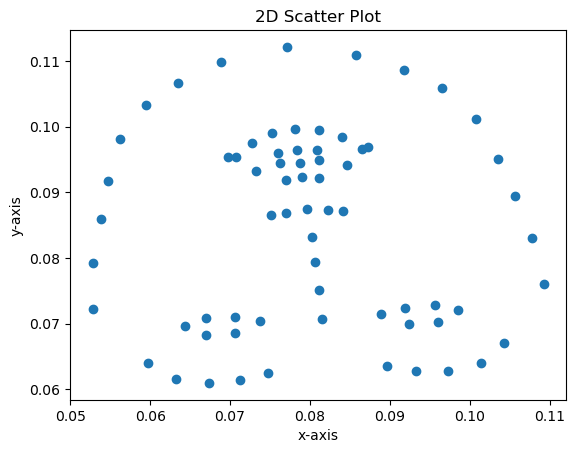

In [13]:


pts = [face.preds["align"].other["lmk3d"].cpu() for face in response.faces]

pts = torch.stack(pts)
pts = torch.swapaxes(pts, 2, 1)


# data = normalize(pts[0])
data = pts[0]

norm = np.linalg.norm(data)  # Calculate the L2 norm of the data
normalized_data = data / norm

# Extract the first two columns for 2D scatter plot
x = normalized_data[:, 0]  # First column (x)
y = normalized_data[:, 1]  # Second column (y)
z = normalized_data[:, 2]  # Third column (z)

# Create the 2D scatter plot
plt.scatter(x, y)
# print(len(z))

# Add labels and title
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('2D Scatter Plot')

# Display the plot
plt.show()


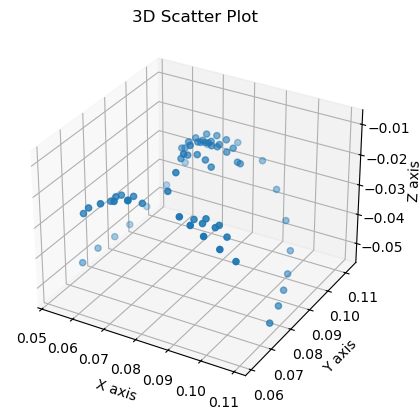

In [14]:
data = pts[0]

# Extract the three columns for 3D scatter plot
x = data[:, 0]  # First column (x)
y = data[:, 1]  # Second column (y)
z = data[:, 2]  # Third column (z)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

norm = np.linalg.norm(data)  # Calculate the L2 norm of the data
normalized_data = data / norm

x = normalized_data[:, 0]  # First column (x)
y = normalized_data[:, 1]  # Second column (y)
z = normalized_data[:, 2]  # Third column (z)

# Create the 3D scatter plot
ax.scatter(x, y, z)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D Scatter Plot')

# Display the plot
plt.show()

[[-3.44448879 -2.94967042 -3.79426354 -3.43135092 -4.09365642 -2.87785884
  -2.96368163 -3.60813638 -2.99354952 -5.18949834 -3.36988267 -4.35601011
  -2.96025345 -3.30586105 -2.48353673 -3.03451904 -2.84926984 -2.89157226
  -2.83056355 -2.71128599 -3.22920471 -2.73030734 -4.08347764 -2.60306983
  -3.2208157  -2.09424342 -2.93994888 -1.38013469 -1.66802877 -1.459608
  -1.50889938 -0.89307028 -0.97733251 -0.38784256 -1.07338412 -0.38784256
  -0.97733251 -0.89307028 -1.50889938 -1.459608   -1.66802877 -1.38013469
  -2.93994888 -2.09424342 -3.2208157  -2.60306983 -4.08347764 -2.73030734
  -3.22920471 -2.71128599 -2.83056355 -2.89157226 -2.84926984 -3.03451904
  -2.48353673 -3.30586105 -2.96025345 -4.35601011 -3.36988267 -5.18949834
  -2.99354952 -3.60813638 -2.96368163 -2.87785884 -4.09365642 -3.43135092
  -3.79426354 -2.94967042]
 [-3.87906006 -3.08405967 -2.64141375 -3.88097126 -3.38342851 -3.10808582
  -2.54641999 -3.47699327 -3.61920915 -2.65661019 -3.17993631 -2.91797601
  -3.81940093

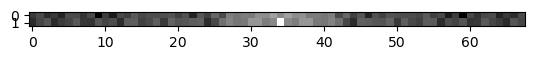

In [15]:
arr = response.faces[0].preds["align"].other["lmk3d"].cpu().numpy()

arrTwoDim = arr[:-1]

norm = np.linalg.norm(arrTwoDim)  # Calculate the L2 norm of the data
normalized_data = arrTwoDim / norm
transformed = np.fft.fft2(normalized_data)
transformedShifted = np.fft.fftshift(transformed)
logAbs = np.log(np.abs(transformedShifted))
print(logAbs)
plt.imshow(logAbs, cmap='gray')
plt.show()


[[-2.79557812 -3.13305763 -4.00508379 -2.92169097 -4.88731944 -2.79314684
  -3.39179023 -2.84735997 -3.01399599 -3.60351719 -3.93107505 -3.1624288
  -3.24289671 -2.44743879 -2.29348945 -3.65181745 -2.33501133 -3.58967553
  -3.00317255 -3.03518866 -2.36179396 -2.97383893 -2.63572089 -2.65041359
  -2.92690275 -2.53408013 -3.02808333 -0.94849996 -1.52388114 -1.41212543
  -1.42613338 -0.72406303 -0.40429707 -0.0429154   1.97892515 -1.00022722
  -3.31242825 -1.15700184 -1.07530229 -1.10983561 -1.06386639 -1.42400017
  -2.37137486 -1.99750633 -3.87308961 -2.2714728  -3.09993758 -2.38818963
  -2.22560955 -2.51687051 -2.89819548 -2.55895934 -2.74850571 -2.76923123
  -2.69889893 -2.6717801  -2.71448486 -3.87874952 -3.23775915 -3.3194811
  -2.72721959 -4.05669755 -2.60254698 -2.85740312 -3.66674772 -3.65460056
  -3.02838582 -2.74428046]
 [-3.70602114 -3.00630937 -2.56063733 -5.20543743 -2.86641196 -3.0533101
  -2.54113146 -3.18553488 -2.99962607 -2.62736577 -2.85750732 -2.74700101
  -3.61868749 

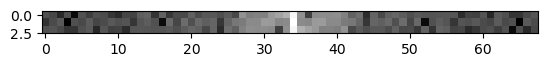

In [16]:
arr = response.faces[0].preds["align"].other["lmk3d"].cpu().numpy()

norm = np.linalg.norm(arr)  # Calculate the L2 norm of the data
normalized_data = arr / norm
transformed = np.fft.fftn(normalized_data)
transformedShifted = np.fft.fftshift(transformed)
logAbs = np.log(np.abs(transformedShifted))
print(logAbs)
plt.imshow(logAbs, cmap='gray')
plt.show()
